# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=739278108a0ce6c621931916a488ab81b7c83c9fc22f828e2fb8223b4702ee8d
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 7.24s ===============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
batch_size = 32  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 10  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 1e-3  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 1e-4 # regularization. Increase this to combat overfitting
dropout = 0.3
num_workers = 0   

In [5]:
!pip install pytest

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning
import multiprocessing


# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(
    "resnet18",
    n_classes=num_classes,
)

# train the model
optimizer = get_optimizer(
    model_transfer,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
)
loss = get_loss()


data_loaders = get_data_loaders(
    batch_size=batch_size,
    valid_size=valid_size,
    num_workers=num_workers, 
)

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False #I am having trouble with memory, so i turned it off.
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 32/32 [01:56<00:00,  3.64s/it]


Epoch: 1 	Training Loss: 3.327745 	Validation Loss: 2.325182
New minimum validation loss: 2.325182. Saving model ...
New minimum validation loss: 2.325182. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:49<00:00,  3.43s/it]


Epoch: 2 	Training Loss: 2.380246 	Validation Loss: 1.795691
New minimum validation loss: 1.795691. Saving model ...
New minimum validation loss: 1.795691. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:48<00:00,  3.40s/it]


Epoch: 3 	Training Loss: 2.007274 	Validation Loss: 1.524252
New minimum validation loss: 1.524252. Saving model ...
New minimum validation loss: 1.524252. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:55<00:00,  3.59s/it]


Epoch: 4 	Training Loss: 1.819091 	Validation Loss: 1.444204
New minimum validation loss: 1.444204. Saving model ...
New minimum validation loss: 1.444204. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:59<00:00,  3.73s/it]


Epoch: 5 	Training Loss: 1.675923 	Validation Loss: 1.341598
New minimum validation loss: 1.341598. Saving model ...
New minimum validation loss: 1.341598. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:53<00:00,  3.55s/it]


Epoch: 6 	Training Loss: 1.621635 	Validation Loss: 1.283268
New minimum validation loss: 1.283268. Saving model ...
New minimum validation loss: 1.283268. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:59<00:00,  3.73s/it]


Epoch: 7 	Training Loss: 1.550377 	Validation Loss: 1.304985


Validating: 100%|███████████████████████████████| 32/32 [01:51<00:00,  3.50s/it]


Epoch: 8 	Training Loss: 1.481034 	Validation Loss: 1.266020
New minimum validation loss: 1.266020. Saving model ...
New minimum validation loss: 1.266020. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [01:53<00:00,  3.55s/it]


Epoch: 9 	Training Loss: 1.449655 	Validation Loss: 1.205682
New minimum validation loss: 1.205682. Saving model ...
New minimum validation loss: 1.205682. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [02:02<00:00,  3.83s/it]

Epoch: 10 	Training Loss: 1.396420 	Validation Loss: 1.221581


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 
I started from a pretrained ResNet18 to use its strong feature extraction capabilities and fine-tuned only the final layers to adapt it to 50 landmark classes.
I added dropout and weight decay to reduce overfitting, while adjusting learning rate and optimizer to stabilize convergence.
This architecture is suitable because it balances transfer learning efficiency with task-specific adaptation, achieving strong generalization on a relatively small dataset.


Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [7]:
!pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 40/40 [02:26<00:00,  3.65s/it]


Test Loss: 1.129174


Test Accuracy: 71% (889/1250)


1.1291735477745535

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [8]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [04:44<00:00,  4.40it/s]


Accuracy: 0.692


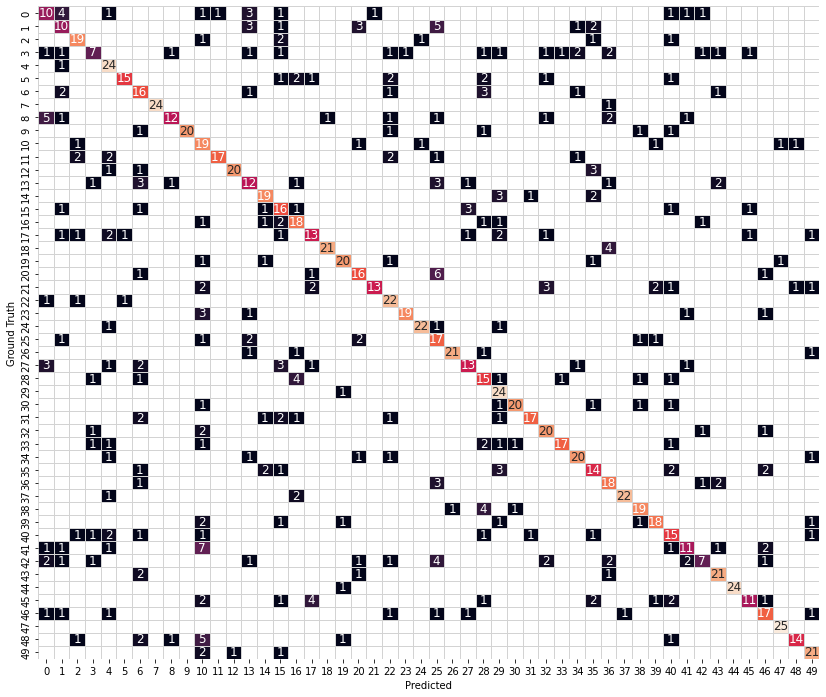

In [9]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)